# Clustering with the Self Organizing Maps (SOMs)

Let's see a code snippet to gain confidence with this flexible clustering method.

In [10]:
from minisom import MiniSom
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

The Self Organizing Maps (SOM) are **Artificial Neural Networks** able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display.

SOM has just two layers:
* the Input layer;
* the Output layer.

That's it.

The architecture of the SOM with C = 3 clusters and n = 10 input features of any sample is given below:
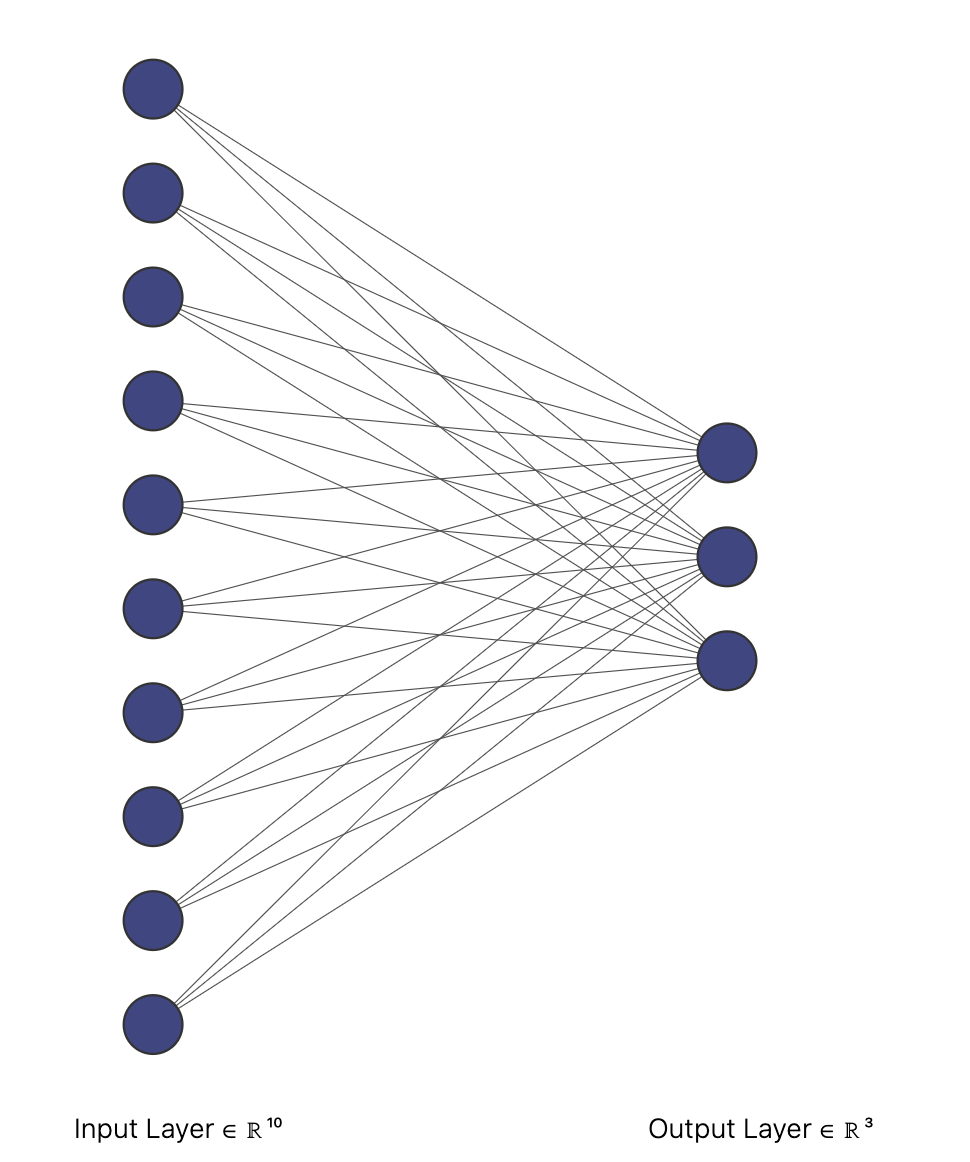

For a review, see (you can find the paper in the material) : https://www.researchgate.net/publication/263084866_An_Introduction_to_Self-Organizing_Maps

For a (quick, intuitive, non rigorous) introduction:
https://www.geeksforgeeks.org/self-organising-maps-kohonen-maps/

MiniSom (https://github.com/JustGlowing/minisom) is nice library, a minimalistic Numpy based implementation of the SOM.

## Create some synthetic data
In order to use MiniSom (Numpy-based), your data needs to be organized as a Numpy matrix where each row corresponds to an observation and each column is a feature.

In [23]:
# Set up data - synthetic data (bidimensional, 3 clusters)
input_dim = 2
num_clusters = 3
X, y = make_blobs(n_samples=10000, n_features=input_dim, centers=num_clusters, random_state=42)
data = X

## Train & and segment (cluster)


In [27]:
# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.4, learning_rate=.3,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.3296480755609457


We consider all the sample mapped into a specific neuron as a cluster. To identify each cluster more easily we  translate the bidimensional indexes of the neurons on the SOM into a monodimentional indexes:


In [28]:
# Each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

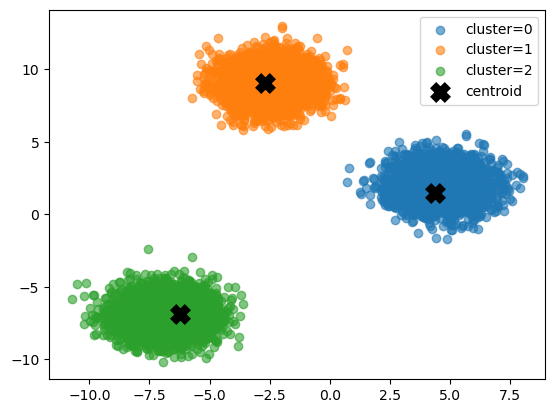

In [29]:
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.6)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=20, linewidths=15, color='k', label='centroid')
plt.legend();